# Twitter _ Spark 

Renad ALahmadi 

Learning Objectives:
1. How to connect to your Twitter Developer account.
2. Verifying credentials and accessing your own information.
3. Fetching tweets using search terms and parameters.
4. Set a rule to search for Tweets on any cryptocurrency (Bitcoin, Ethereum, Dogecoin, Shiba, etc.) --> Bitcoin.


### Note: It's hard to try to fetch a large number of data because of machin limitation and twitter too.

In [81]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re 
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pyspark.sql.dataframe
from pyspark.sql.functions import regexp_replace, col, lower
from pyspark.sql.types import *
from pyspark.ml.feature import *


%matplotlib inline

--------------------------------------------------

### 1- Making a Connection

In [19]:

#These will be found on your Twitter Developer Account. These are your personal keys and should not be shared with anyone else.

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [20]:

#Creating a variable calling Authentication Handler and passing all of the keys from above as arguments.
auth = tweepy.OAuth1UserHandler(
  consumer_key, 
  consumer_secret, 
  access_token, 
  access_token_secret
)

#Connecting to Twitter API by passing the variable created above that contains all the keys.
api = tweepy.API(auth)

--------------------------------

### 2- Verifying Credentials

Obviously, you don't want to connect to someone else's account mistakenly. So now since the connection has been made, you can verify your credentials by running the following cells.

In [21]:
#Accessing and Storing Credentials
me = api.verify_credentials()

In [22]:
#Your Twitter ID
me.id

1225732863250911232

In [23]:
#Your Screen Name
me.screen_name

'Renad_alah'

In [24]:
#Your Followers' Count
me.followers_count

100

In [25]:
#Your Description
me.description

'Computer Science , interested in AI & Data Science'

In [26]:
#Your Location
me.location

''

In [27]:
#The date you created your account
me.created_at

datetime.datetime(2020, 2, 7, 10, 47, 51, tzinfo=datetime.timezone.utc)

--------------------------------

### 3- Tweets Extraction

Very simply we will set our parameters for searching tweets. Then we will loop through all the tweets one by one.

In [12]:
#Setting some advanced search operators here.
tweets = api.search_tweets("Bitcoin lang:en -is:retweet", tweet_mode="extended")

#Our loop to view all tweets one by one.
for tweet in tweets:
    try:
        print(tweet.retweeted_status.full_text)
        print("=====")
    except AttributeError:
        print(tweet.full_text)
        print("=====")

#Btc/usdt short time fram: Btc/usdt short time fram Bitcoin / TetherUS BINANCE:BTCUSDT almozini hello every one i hope u all have a nice day for BTC /USDT in 4H time frame i see bullish head and shoulder and the target for it around 17710$/ 17522$ and i… https://t.co/00gzXTbLRg
=====
JUST IN: Demand for #Bitcoin mining ASIC has “skyrocketed” in Russia - Russian newspaper Kommersant 🇷🇺
=====
▓▓▓▓▓▓▓▓▓▓▓░░░░ 64.7% 

515 days left  ($17064 per #bitcoin)
=====
Listen. #Bitcoin IS a weapon. It's the most powerful weapon ever discovered. BUT "weapon" is a loaded word (heh), so we are biased to picture attacking rather than defending. Bitcoin is the ultimate weapon of defense. Protector of sovereignty and individual property rights.
1/10 https://t.co/vyFRHyK0g1
=====
#Ethereum price update: 

#ETH $1262.2 USD
#Bitcoin 0.07403761946352935 #BTC

Follow for recent ETH price updates
#altcoin, #cryptocurrency, #crypto
=====
#Bitcoin&amp;#39;S NEXT MOVE WILL CHANGE LIVES!!!!!

https://t.co/AVIvxAZA

In [ ]:
#Here we will create an empty list so that we can add and store tweets into it.
extracted_tweets = []

#Note that previously we separated this section in two parts. 
#One was to initialize the search terms and operators, etc. before (two) looping through.
#But here we are doing that within the loop itself.

for status in tweepy.Cursor(api.search_tweets, 
                            "Bitcoin", 
                            lang="en").items(300): #using items here
    extracted_tweets.append(status)

In [29]:
len(extracted_tweets)

300

------------------------------------------------------------------------------

### 3- Creating a (pandas) DataFrame

We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.

In [31]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in extracted_tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @CryptoMichNL: The thing is that people lit...
1,RT @saylor: #Bitcoin is a Shining City in Cybe...
2,RT @rovercrc: GET READY FOR THE NEXT #BITCOIN ...
3,"RT @Bitflex: There are now ~1,000,000 addresse..."
4,RT @Bitgert_Us: First 5000 Retweets will get 9...
5,"RT @CORE_fan1: On top of this, Core is also EV..."
6,Bankless DAO (BANK) went up 11.0 percent in th...
7,RT @AltbaseApp: What percentage of your #crypt...
8,RT @elsultanbitcoin: Germany is now banning en...
9,#Ethereum price update: \n\n#ETH $1260.81 USD\...


- So we now have a nice table with ordered data.

In [32]:
# Internal methods of a single tweet object:
print(dir(extracted_tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [33]:
# We print info from the first tweet:
print(extracted_tweets[0].id)
print(extracted_tweets[0].created_at)
print(extracted_tweets[0].source)
print(extracted_tweets[0].favorite_count)
print(extracted_tweets[0].retweet_count)
print(extracted_tweets[0].geo)
print(extracted_tweets[0].coordinates)
print(extracted_tweets[0].entities)

1599443975794200576
2022-12-04 16:42:14+00:00
Twitter for Android
0
84
None
None
{'hashtags': [{'text': 'Bitcoin', 'indices': [71, 79]}], 'symbols': [], 'user_mentions': [{'screen_name': 'CryptoMichNL', 'name': 'Michaël van de Poppe', 'id': 146008010, 'id_str': '146008010', 'indices': [3, 16]}], 'urls': []}


#### Data Pre-Processing

In [34]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in extracted_tweets])
data['ID']   = np.array([tweet.id for tweet in extracted_tweets])
data['Date'] = np.array([tweet.created_at for tweet in extracted_tweets])
data['Source'] = np.array([tweet.source for tweet in extracted_tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in extracted_tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in extracted_tweets])

In [36]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @CryptoMichNL: The thing is that people lit...,140,1599443975794200576,2022-12-04 16:42:14+00:00,Twitter for Android,0,84
1,RT @saylor: #Bitcoin is a Shining City in Cybe...,77,1599443974330077184,2022-12-04 16:42:14+00:00,Twitter Web App,0,746
2,RT @rovercrc: GET READY FOR THE NEXT #BITCOIN ...,79,1599443973906796545,2022-12-04 16:42:14+00:00,Twitter for Android,0,17
3,"RT @Bitflex: There are now ~1,000,000 addresse...",104,1599443973348605952,2022-12-04 16:42:14+00:00,Twitter Web App,0,2
4,RT @Bitgert_Us: First 5000 Retweets will get 9...,140,1599443967174934528,2022-12-04 16:42:12+00:00,Twitter for iPad,0,192
5,"RT @CORE_fan1: On top of this, Core is also EV...",99,1599443965711122432,2022-12-04 16:42:12+00:00,Twitter for Android,0,19
6,Bankless DAO (BANK) went up 11.0 percent in th...,139,1599443965576478722,2022-12-04 16:42:12+00:00,Twitter Web App,0,0
7,RT @AltbaseApp: What percentage of your #crypt...,71,1599443965295865856,2022-12-04 16:42:12+00:00,Twitter for Android,0,21
8,RT @elsultanbitcoin: Germany is now banning en...,139,1599443964121460737,2022-12-04 16:42:11+00:00,Twitter for iPhone,0,12
9,#Ethereum price update: \n\n#ETH $1260.81 USD\...,140,1599443963869483009,2022-12-04 16:42:11+00:00,Twitter Web App,0,0


### 4- Visualization and basic statistics

#### Averages and popularity
- We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

- To obtain the mean, using numpy:

In [38]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 119.24333333333334


- To extract more data, we will use some pandas' functionalities:

In [39]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
US Federal Court Judge 🇺🇸👨‍⚖️

"@Dr_CSWright
You created #Bitcoin? YES!

The Bitcoin Whitepaper
Did you write this?… https://t.co/YJ2M2Fjk8y
Number of likes: 5
140 characters.

The tweet with more retweets is: 
RT @saylor: #Bitcoin is Hope. https://t.co/Vo7MuIwKwm
Number of retweets: 2581
53 characters.



#### Time series
- Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

- The way we do it is:

In [40]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

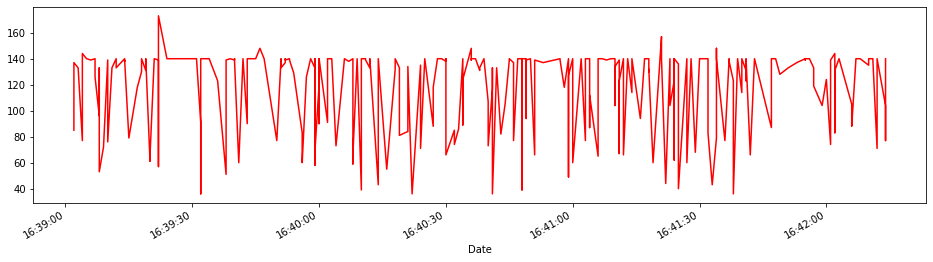

In [41]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

And to plot the likes versus the retweets in the same chart:

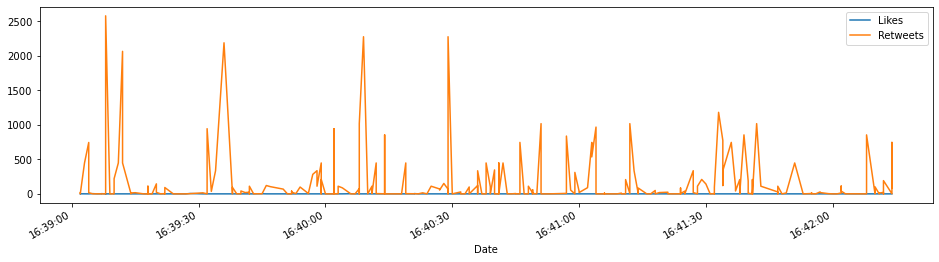

In [42]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

- As we can see the number of retweets is much more than the likes 

Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source. We first clean all the sources to only top 3 since they're a lot:

In [61]:
data['Source'].value_counts()

Twitter for Android              121
Twitter Web App                   84
Twitter for iPhone                55
Twitter for iPad                   7
vaiotapi                           4
IFTTT                              3
Microsoft Power Platform           2
inskatestapp                       2
CryptoNewswire                     2
dlvr.it                            2
Twitter Media Studio               1
pumpcoin.info/                     1
BitcoinLivePriceTicker             1
Drip Star                          1
Bitcoin Block Watcher              1
Crypto Frog                        1
BlockchainDU v.1                   1
Gambiste                           1
EconSnapshot                       1
WordPress.com                      1
100daysofblockchain                1
NFTBOTSELL                         1
Twitter for Mac                    1
TweetDeck                          1
bitcoin_bot369                     1
Crypto live price                  1
cryptfloats webapp                 1
P

In [62]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# taking only the first 5        
sources = sources[0:4]
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web App
* Twitter for iPad
* Twitter for iPhone


We now count the number of each source and create a pie chart

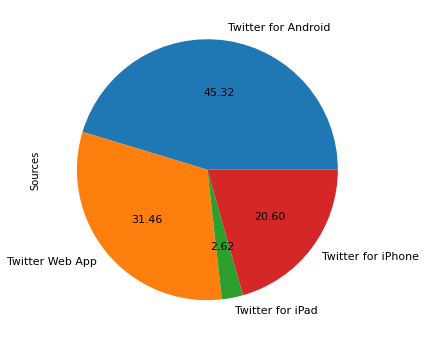

In [63]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

As we can see that most users use twitter from Andriod App or Web App. then , iphone and ipad.

### 5- Sentiment analysis

In [91]:

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|RT", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return 2

In [92]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The thing is that people literally don t want ...,140,1599443975794200576,2022-12-04 16:42:14+00:00,Twitter for Android,0,84,1
1,Bitcoin is a Shining City in Cyberspace,77,1599443974330077184,2022-12-04 16:42:14+00:00,Twitter Web App,0,746,0
2,GET READY FOR THE NEXT BITCOIN MOVE,79,1599443973906796545,2022-12-04 16:42:14+00:00,Twitter for Android,0,17,1
3,There are now 1 000 000 addresses that hold 1 ...,104,1599443973348605952,2022-12-04 16:42:14+00:00,Twitter Web App,0,2,1
4,Us First 5000 Retweets will get 9 million BRIS...,140,1599443967174934528,2022-12-04 16:42:12+00:00,Twitter for iPad,0,192,1
5,fan1 On top of this Core is also EVM compatibl...,99,1599443965711122432,2022-12-04 16:42:12+00:00,Twitter for Android,0,19,1
6,Bankless DAO BANK went up 11 0 percent in the ...,139,1599443965576478722,2022-12-04 16:42:12+00:00,Twitter Web App,0,0,0
7,What percentage of your crypto portfolio is Bi...,71,1599443965295865856,2022-12-04 16:42:12+00:00,Twitter for Android,0,21,0
8,Germany is now banning energy price increases ...,139,1599443964121460737,2022-12-04 16:42:11+00:00,Twitter for iPhone,0,12,0
9,Ethereum price update ETH 1260 81 USD Bitcoin ...,140,1599443963869483009,2022-12-04 16:42:11+00:00,Twitter Web App,0,0,0


In [93]:
# Cleaning the Tweets from special characters

data['Tweets'] = np.array([ clean_tweet(tweet) for tweet in data['Tweets'] ])
# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The thing is that people literally don t want ...,140,1599443975794200576,2022-12-04 16:42:14+00:00,Twitter for Android,0,84,1
1,Bitcoin is a Shining City in Cyberspace,77,1599443974330077184,2022-12-04 16:42:14+00:00,Twitter Web App,0,746,0
2,GET READY FOR THE NEXT BITCOIN MOVE,79,1599443973906796545,2022-12-04 16:42:14+00:00,Twitter for Android,0,17,1
3,There are now 1 000 000 addresses that hold 1 ...,104,1599443973348605952,2022-12-04 16:42:14+00:00,Twitter Web App,0,2,1
4,Us First 5000 Retweets will get 9 million BRIS...,140,1599443967174934528,2022-12-04 16:42:12+00:00,Twitter for iPad,0,192,1
5,fan1 On top of this Core is also EVM compatibl...,99,1599443965711122432,2022-12-04 16:42:12+00:00,Twitter for Android,0,19,1
6,Bankless DAO BANK went up 11 0 percent in the ...,139,1599443965576478722,2022-12-04 16:42:12+00:00,Twitter Web App,0,0,0
7,What percentage of your crypto portfolio is Bi...,71,1599443965295865856,2022-12-04 16:42:12+00:00,Twitter for Android,0,21,0
8,Germany is now banning energy price increases ...,139,1599443964121460737,2022-12-04 16:42:11+00:00,Twitter for iPhone,0,12,0
9,Ethereum price update ETH 1260 81 USD Bitcoin ...,140,1599443963869483009,2022-12-04 16:42:11+00:00,Twitter Web App,0,0,0


In [95]:
# More cleaning --> removing RT from the Tweets column

Remove_RT = lambda x: re.compile('\#').sub('', re.compile('RT').sub('', x, count=1).strip())
data['Tweets'] = np.array([ Remove_RT(tweet) for tweet in data['Tweets'] ])

In [96]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The thing is that people literally don t want ...,140,1599443975794200576,2022-12-04 16:42:14+00:00,Twitter for Android,0,84,1
1,Bitcoin is a Shining City in Cyberspace,77,1599443974330077184,2022-12-04 16:42:14+00:00,Twitter Web App,0,746,0
2,GET READY FOR THE NEXT BITCOIN MOVE,79,1599443973906796545,2022-12-04 16:42:14+00:00,Twitter for Android,0,17,1
3,There are now 1 000 000 addresses that hold 1 ...,104,1599443973348605952,2022-12-04 16:42:14+00:00,Twitter Web App,0,2,1
4,Us First 5000 Retweets will get 9 million BRIS...,140,1599443967174934528,2022-12-04 16:42:12+00:00,Twitter for iPad,0,192,1
5,fan1 On top of this Core is also EVM compatibl...,99,1599443965711122432,2022-12-04 16:42:12+00:00,Twitter for Android,0,19,1
6,Bankless DAO BANK went up 11 0 percent in the ...,139,1599443965576478722,2022-12-04 16:42:12+00:00,Twitter Web App,0,0,0
7,What percentage of your crypto portfolio is Bi...,71,1599443965295865856,2022-12-04 16:42:12+00:00,Twitter for Android,0,21,0
8,Germany is now banning energy price increases ...,139,1599443964121460737,2022-12-04 16:42:11+00:00,Twitter for iPhone,0,12,0
9,Ethereum price update ETH 1260 81 USD Bitcoin ...,140,1599443963869483009,2022-12-04 16:42:11+00:00,Twitter Web App,0,0,0


<AxesSubplot:xlabel='SA', ylabel='count'>

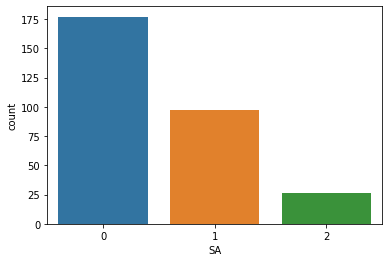

In [97]:
# Lets try to count the distribution of sentiments across the tweets we gathered
sns.countplot(x='SA', data=data)

In [100]:
# We construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 1]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 1]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 1]

In [101]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 59.0%
Percentage of neutral tweets: 32.333333333333336%
Percentage de negative tweets: 8.666666666666666%


In [102]:
df = data[['Tweets','SA']]
df.head(5)

,Tweets,SA
0,The thing is that people literally don t want ...,1
1,Bitcoin is a Shining City in Cyberspace,0
2,GET READY FOR THE NEXT BITCOIN MOVE,1
3,There are now 1 000 000 addresses that hold 1 ...,1
4,Us First 5000 Retweets will get 9 million BRIS...,1


### 6-  Model Building

#### Converting Pandas df --> Spark df

In [69]:
# Necessary Imports
from pyspark.sql import SparkSession, SQLContext

# Build a spark session - driver's memory increased for training models later.
spark = SparkSession.builder.config("spark.driver.memory", "15g").appName('Tweets_Renad').getOrCreate()

In [103]:

# Convert Pandas dataframe to Spark dataframe

schema = StructType([\
    StructField("text", StringType(), True),\
    StructField("sentiment", IntegerType(), True)])

df_spark = spark.createDataFrame(df, schema=schema)

#### More Processing  and Data Transformtion. 

In [104]:
# Lower all the text in the text column and put it in a new column
df_spark = df_spark.select("*", lower(col('text'))) 
df_spark = df_spark.select("lower(text)", "sentiment") #get lower(text) and sentiment column
df_spark = df_spark.withColumnRenamed("lower(text)","text") #rename lower(text) column to text

In [105]:
# Tokening the text column would separate each word in a tweet and make one tweet a list of words.

tokenizer = Tokenizer(inputCol="text", outputCol="words")
tokenized_data = tokenizer.transform(df_spark)
tokenized_data.show(truncate=True, n=5)

+--------------------+---------+--------------------+
|                text|sentiment|               words|
+--------------------+---------+--------------------+
|the thing is that...|        1|[the, thing, is, ...|
|bitcoin is a shin...|        0|[bitcoin, is, a, ...|
|get ready for the...|        1|[get, ready, for,...|
|there are now 1 0...|        1|[there, are, now,...|
|us first 5000 ret...|        1|[us, first, 5000,...|
+--------------------+---------+--------------------+
only showing top 5 rows



In [106]:
# Stop Words Remover will remove all less meaning words like helping verbs, etc.

swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="MeaningfulWords")
SwRemoved_data = swr.transform(tokenized_data)
SwRemoved_data.show(truncate=True, n=5)

+--------------------+---------+--------------------+--------------------+
|                text|sentiment|               words|     MeaningfulWords|
+--------------------+---------+--------------------+--------------------+
|the thing is that...|        1|[the, thing, is, ...|[thing, people, l...|
|bitcoin is a shin...|        0|[bitcoin, is, a, ...|[bitcoin, shining...|
|get ready for the...|        1|[get, ready, for,...|[get, ready, next...|
|there are now 1 0...|        1|[there, are, now,...|[1, 000, 000, add...|
|us first 5000 ret...|        1|[us, first, 5000,...|[us, first, 5000,...|
+--------------------+---------+--------------------+--------------------+
only showing top 5 rows



In [107]:
# Hashing TF will convert the meaningful words into numerical features.

hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features")
trans_data = hashTF.transform(SwRemoved_data).select('sentiment', 'MeaningfulWords', 'features')
trans_data.show(truncate=True, n=3)

+---------+--------------------+--------------------+
|sentiment|     MeaningfulWords|            features|
+---------+--------------------+--------------------+
|        1|[thing, people, l...|(262144,[70065,13...|
|        0|[bitcoin, shining...|(262144,[132778,1...|
|        1|[get, ready, next...|(262144,[54961,13...|
+---------+--------------------+--------------------+
only showing top 3 rows



In [108]:
trans_data.show(5)

+---------+--------------------+--------------------+
|sentiment|     MeaningfulWords|            features|
+---------+--------------------+--------------------+
|        1|[thing, people, l...|(262144,[70065,13...|
|        0|[bitcoin, shining...|(262144,[132778,1...|
|        1|[get, ready, next...|(262144,[54961,13...|
|        1|[1, 000, 000, add...|(262144,[5765,354...|
|        1|[us, first, 5000,...|(262144,[2181,366...|
+---------+--------------------+--------------------+
only showing top 5 rows



#### Splitting 

In [109]:
train, test = trans_data.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 240
Test Dataset Count: 60


#### Training and Testing 

In [110]:
# Decision Tree
dt = DecisionTreeClassifier(labelCol="sentiment", featuresCol="features")

# fitting the data 
model_dt = dt.fit(train)

In [111]:
# Predictions on the testing set
pred_dt = model_dt.transform(test)

In [112]:
pred_dt.select("sentiment", "prediction").show(10)

+---------+----------+
|sentiment|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        1|       0.0|
|        1|       0.0|
|        1|       0.0|
+---------+----------+
only showing top 10 rows



In [113]:
# Random Forest
rf = RandomForestClassifier(labelCol="sentiment", featuresCol="features", numTrees=10)

# fitting the data 
model_rf = rf.fit(train)

In [114]:
# Predictions on the testing set

pred_rf = model_rf.transform(test)

In [115]:
pred_rf.select("sentiment", "prediction").show(10)

+---------+----------+
|sentiment|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        1|       0.0|
|        1|       0.0|
|        1|       0.0|
+---------+----------+
only showing top 10 rows



In [116]:
# Naive Bayes
nb = NaiveBayes(smoothing=1.0, modelType="multinomial", labelCol="sentiment", featuresCol="features")

# fitting the data 
model_nb = nb.fit(train)

In [117]:
# Predictions on the testing set
pred_nb = model_nb.transform(test)

In [118]:
pred_nb.select("sentiment", "prediction").show(10)

+---------+----------+
|sentiment|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       1.0|
|        0|       0.0|
|        1|       0.0|
|        1|       0.0|
|        1|       1.0|
|        1|       0.0|
+---------+----------+
only showing top 10 rows



### Model Evaluation 

In [120]:
# Accuracy Metric
evaluator_A = MulticlassClassificationEvaluator(labelCol="sentiment", predictionCol="prediction", metricName="accuracy")

# F1 Metric
evaluator_F = MulticlassClassificationEvaluator(labelCol="sentiment", predictionCol="prediction", metricName="f1")

# Weighted Precision
evaluator_P = MulticlassClassificationEvaluator(labelCol="sentiment", predictionCol="prediction", metricName="weightedPrecision")

# Weighted Recall
evaluator_R = MulticlassClassificationEvaluator(labelCol="sentiment", predictionCol="prediction", metricName="weightedRecall")

# Our models
models = [pred_dt, pred_rf, pred_nb]

# Empty lists that will store the scores for each metric for each model.
accuracy = []
F1 = []
precision = []
recall = []

# Simple loop to populate the empty lists with scores of models for each metric.
for model in models:
    accuracy.append(evaluator_A.evaluate(model))
    F1.append(evaluator_F.evaluate(model))
    precision.append(evaluator_P.evaluate(model))
    recall.append(evaluator_R.evaluate(model))

In [121]:
# We will convert all lists created above into a dataframe for easy viewing.
df_ev = pd.DataFrame(list(zip(accuracy, F1, precision, recall)), 
                     columns = ['Accuracy', 'F1 score', 'Weighted Precision', 'Weighted Recall'],
                     index = ['Decision Tree', 'Random Forest', 'Naive Bayes'])

In [122]:
df_ev

,Accuracy,F1 score,Weighted Precision,Weighted Recall
Decision Tree,0.650000,0.585229,0.659295,0.650000
Random Forest,0.550000,0.390323,0.302500,0.550000
Naive Bayes,0.666667,0.645322,0.693556,0.666667


#### We can see that NB performed better here. 